# Load from Features Notebook

In [1]:
import dill
dill.load_session("Notebook_Saves/features.db")

In [2]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [3]:
from warnings import simplefilter
simplefilter('ignore')

# Exploration for Features
Training Set

The dataset has a lot of outliers, we try to normalize each feature, firstly we tried winsorization to shrink the data range, then we use some Log-transformation to deal with the right skew problems.

In [4]:
training.describe()

,event_count,purchase_count,session_count,previous_sessions_duration,spend,event_gap,session_gap,life_time,os_ios,os_android,country_mean_enc
count,619423.000000,619423.000000,619423.000000,6.191850e+05,619423.0,6.187660e+05,6.191850e+05,6.191850e+05,619423.000000,619423.000000,618633.000000
mean,157.847904,0.377758,7.889856,4.166851e+06,NaN,3.308371e+09,3.416604e+09,3.838521e+09,0.335448,0.664168,0.009896
std,441.877253,3.064517,22.203001,1.402423e+07,NaN,1.475462e+09,1.592156e+09,1.473469e+09,0.472147,0.472281,0.006094
min,0.000000,0.000000,0.000000,0.000000e+00,0.0,1.209600e+09,6.048006e+08,1.209632e+09,0.000000,0.000000,0.000000
25%,14.000000,0.000000,1.000000,0.000000e+00,0.0,1.978475e+09,2.068929e+09,2.581888e+09,0.000000,0.000000,0.003125
50%,36.000000,0.000000,2.000000,6.084000e+04,0.0,3.161514e+09,3.381389e+09,3.821525e+09,0.000000,1.000000,0.012661
75%,109.000000,0.000000,5.000000,2.404500e+06,0.0,4.543095e+09,4.739420e+09,5.086515e+09,1.000000,1.000000,0.015221
max,23186.000000,445.000000,1264.000000,9.696036e+08,1053.0,6.454623e+09,6.454791e+09,6.479999e+09,1.000000,1.000000,0.333333


### Event Count

(array([6.14565e+05, 3.96900e+03, 6.74000e+02, 1.52000e+02, 3.80000e+01,
        1.00000e+01, 6.00000e+00, 4.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([    0. ,  2318.6,  4637.2,  6955.8,  9274.4, 11593. , 13911.6,
        16230.2, 18548.8, 20867.4, 23186. ]),
 <a list of 10 Patch objects>)

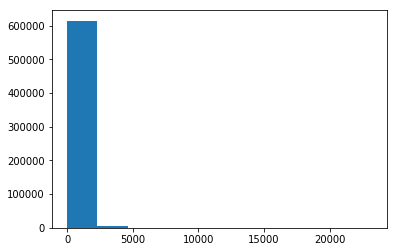

In [5]:
plt.hist(training.event_count)

(array([409270.,  83824.,  34815.,  18620.,  13261.,   9384.,   6589.,
          5082.,   4064.,  34514.]),
 array([  0. ,  71.7, 143.4, 215.1, 286.8, 358.5, 430.2, 501.9, 573.6,
        645.3, 717. ]),
 <a list of 10 Patch objects>)

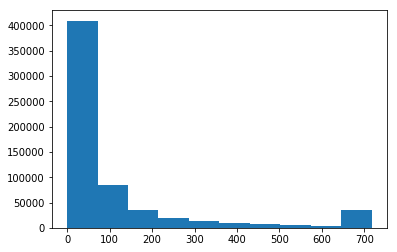

In [6]:
plt.hist(winsorize(training.event_count, limits=[0,0.05]))

(array([   334.,  35039.,  64329.,  51198., 104999., 105086.,  93102.,
         65097.,  42566.,  57673.]),
 array([0.        , 0.65750758, 1.31501517, 1.97252275, 2.63003034,
        3.28753792, 3.9450455 , 4.60255309, 5.26006067, 5.91756826,
        6.57507584]),
 <a list of 10 Patch objects>)

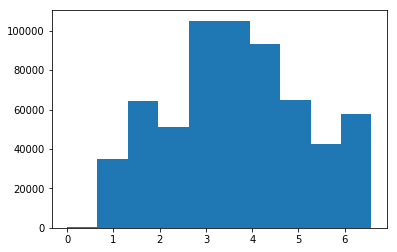

In [7]:
plt.hist(np.log(winsorize(training.event_count, limits=[0,0.05])))

In [8]:
event_num = training[training.event_count > 10_000]['user_purchase_binary_7_days'].sum()
print(f"# of Users above 10,000 event counts: {event_num}")

# of Users above 10,000 event counts: 18


### Purchase Count

(array([6.18878e+05, 4.69000e+02, 5.70000e+01, 1.40000e+01, 3.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  44.5,  89. , 133.5, 178. , 222.5, 267. , 311.5, 356. ,
        400.5, 445. ]),
 <a list of 10 Patch objects>)

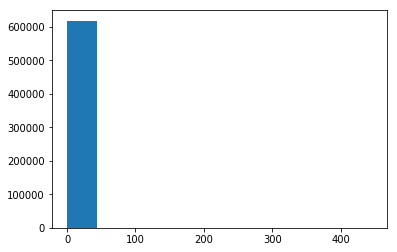

In [9]:
plt.hist(training.purchase_count)

(array([    0.,     0.,     0.,     0.,     0., 32591.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

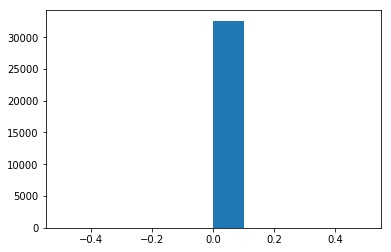

In [10]:
plt.hist(np.log(winsorize(training.purchase_count, limits=[0,0.05])))

### Session Count

(array([6.15366e+05, 3.30500e+03, 5.74000e+02, 1.21000e+02, 4.00000e+01,
        9.00000e+00, 1.00000e+00, 6.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0. ,  126.4,  252.8,  379.2,  505.6,  632. ,  758.4,  884.8,
        1011.2, 1137.6, 1264. ]),
 <a list of 10 Patch objects>)

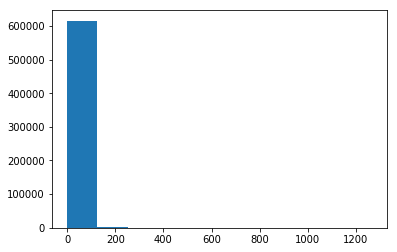

In [11]:
plt.hist(training.session_count)

(array([2.81091e+05, 9.48110e+04, 2.38000e+02, 7.73430e+04, 2.07790e+04,
        3.76470e+04, 2.70020e+04, 1.97900e+04, 1.62170e+04, 4.45050e+04]),
 array([0.        , 0.35553481, 0.71106961, 1.06660442, 1.42213922,
        1.77767403, 2.13320884, 2.48874364, 2.84427845, 3.19981326,
        3.55534806]),
 <a list of 10 Patch objects>)

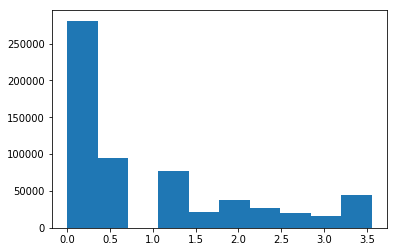

In [12]:
plt.hist(np.log(winsorize(training.session_count, limits=[0,0.05])))

### Country

In [13]:
training.country.value_counts()

US    278279
GB     44216
IN     43073
PH     26856
CA     19692
AU     17073
ZA     11240
ID      9994
MY      8439
BR      7479
DE      6235
PK      5463
NL      5250
BD      4340
SE      4026
PL      3944
EG      3901
NZ      3820
RO      3706
MX      3656
FR      3492
SG      3470
NG      3380
VN      3088
TR      2972
RU      2819
IT      2757
NP      2740
BE      2699
IE      2696
       ...  
TJ         7
AD         7
GN         6
TL         5
MC         4
BI         4
EH         4
DJ         4
CG         4
LI         4
VU         3
KI         3
FM         3
WS         3
YT         3
MS         3
SB         2
NR         2
AX         2
SS         2
BL         2
NF         1
ST         1
SJ         1
LS         1
PM         1
CK         1
GQ         1
NU         1
FK         1
Name: country, Length: 227, dtype: int64

### OS

In [14]:
training.os_name.value_counts()

Android OS    411401
iOS           203465
iPhone OS       4319
Missing          238
Name: os_name, dtype: int64

### Previous Session Duration

(array([6.16697e+05, 2.10700e+03, 2.98000e+02, 5.00000e+01, 1.40000e+01,
        1.20000e+01, 3.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([0.00000000e+00, 9.69603636e+07, 1.93920727e+08, 2.90881091e+08,
        3.87841454e+08, 4.84801818e+08, 5.81762181e+08, 6.78722545e+08,
        7.75682909e+08, 8.72643272e+08, 9.69603636e+08]),
 <a list of 10 Patch objects>)

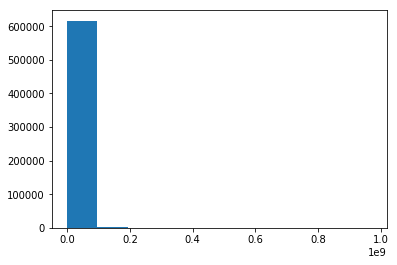

In [16]:
plt.hist(training.previous_sessions_duration)

(array([2.86823e+05, 1.70000e+01, 6.40000e+01, 4.41000e+02, 2.21900e+03,
        1.01690e+04, 2.71110e+04, 6.22270e+04, 1.13642e+05, 1.16710e+05]),
 array([ 0.40546511,  2.05185151,  3.69823791,  5.34462431,  6.99101071,
         8.63739711, 10.28378351, 11.93016991, 13.57655631, 15.2229427 ,
        16.8693291 ]),
 <a list of 10 Patch objects>)

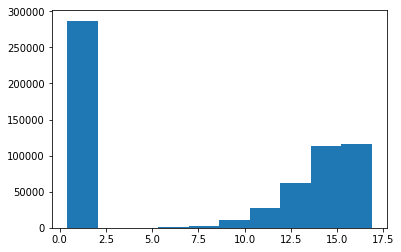

In [17]:
plt.hist(np.log(winsorize(training.previous_sessions_duration, limits=[0,0.05])))

### Spending Value

(array([6.18341e+05, 8.74000e+02, 1.48000e+02, 3.50000e+01, 1.40000e+01,
        5.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   0. ,  105.3,  210.6,  315.9,  421.2,  526.5,  631.8,  737.1,
         842.4,  947.7, 1053. ]),
 <a list of 10 Patch objects>)

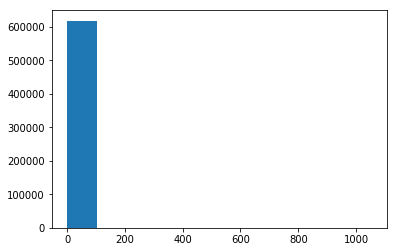

In [18]:
plt.hist(training.spend)

(array([2.86824e+05, 3.20000e+01, 2.85000e+02, 2.08900e+03, 1.37300e+04,
        4.21510e+04, 1.13036e+05, 1.22190e+05, 3.75560e+04, 1.29200e+03]),
 array([ 0.40546511,  2.43415839,  4.46285167,  6.49154495,  8.52023823,
        10.54893152, 12.5776248 , 14.60631808, 16.63501136, 18.66370464,
        20.69239792]),
 <a list of 10 Patch objects>)

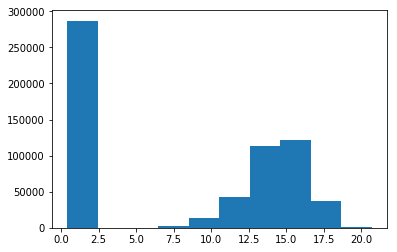

In [19]:
plt.hist(np.log(winsorize(training.previous_sessions_duration)))

### Event Gap

(array([116865.,  76775.,  69486.,  62518.,  63092.,  57283.,  55601.,
         47987.,  42352.,  26807.]),
 array([1.20960049e+09, 1.73410276e+09, 2.25860504e+09, 2.78310731e+09,
        3.30760958e+09, 3.83211186e+09, 4.35661413e+09, 4.88111640e+09,
        5.40561868e+09, 5.93012095e+09, 6.45462322e+09]),
 <a list of 10 Patch objects>)

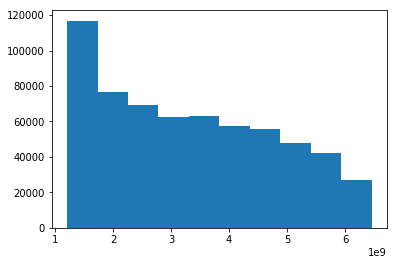

In [20]:
plt.hist(training.event_gap)

### Life Time

(array([48025., 70806., 72127., 69364., 68687., 66183., 64513., 61058.,
        53432., 44990.]),
 array([6.04800571e+08, 1.18979961e+09, 1.77479866e+09, 2.35979770e+09,
        2.94479675e+09, 3.52979579e+09, 4.11479483e+09, 4.69979388e+09,
        5.28479292e+09, 5.86979196e+09, 6.45479101e+09]),
 <a list of 10 Patch objects>)

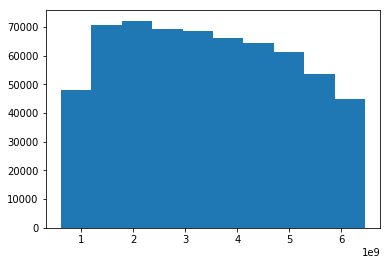

In [21]:
plt.hist(training.session_gap)